In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


df = pd.read_excel('data.xlsx')
df= df.dropna(axis=1)
print(df)

          age  income student credit_rating buys_computer
0      < = 30    high      no          fair            no
1      < = 30    high      no     excellent            no
2   31 ... 40    high      no          fair           yes
3        > 40  medium      no          fair           yes
4        > 40     low     yes          fair           yes
5        > 40     low     yes     excellent            no
6   31 ... 40     low     yes     excellent           yes
7      < = 30  medium      no          fair            no
8      < = 30     low     yes          fair           yes
9        > 40  medium     yes          fair           yes
10     < = 30  medium     yes     excellent           yes
11  31 ... 40  medium      no     excellent           yes
12  31 ... 40    high     yes          fair           yes
13       > 40  medium      no     excellent            no


In [10]:
import math

# Calculate entropy
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

# Calculate information gain for a feature
def information_gain(data, feature_name, target_name):
    # Calculate entropy for the entire dataset
    total_entropy = entropy(data[target_name].value_counts(normalize=True)[0])
    
    # Calculate conditional entropy for the feature
    feature_entropy = 0
    for value in data[feature_name].unique():
        subset = data[data[feature_name] == value]
        weight = len(subset) / len(data)
        subset_entropy = entropy(subset[target_name].value_counts(normalize=True)[0])
        feature_entropy += weight * subset_entropy
    
    # Calculate information gain
    info_gain = total_entropy - feature_entropy
    return info_gain

# Calculate information gain for each feature
target_name = 'buys_computer'
information_gains = {}
for feature in df.columns.difference([target_name]):
    information_gains[feature] = information_gain(df, feature, target_name)

# Find the feature with the highest information gain
print(information_gains)
root_node = max(information_gains, key=information_gains.get)
print(f"The root node feature is: {root_node}")

{'age': 0.24674981977443933, 'credit_rating': 0.04812703040826949, 'income': 0.02922256565895487, 'student': 0.15183550136234159}
The root node feature is: age


C:\Users\send2\AppData\Local\Temp\ipykernel_38900\1735148804.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_entropy = entropy(data[target_name].value_counts(normalize=True)[0])
C:\Users\send2\AppData\Local\Temp\ipykernel_38900\1735148804.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  subset_entropy = entropy(subset[target_name].value_counts(normalize=True)[0])
C:\Users\send2\AppData\Local\Temp\ipykernel_38900\1735148804.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Tr_X contains all columns except 'buys_computer'
Tr_X = df.drop(columns=['buys_computer'])

# Tr_y contains only the 'buys_computer' column
Tr_y = df['buys_computer']




In [29]:
# Create a Decision Tree Classifier model
model = DecisionTreeClassifier()

# Fit the model to your training data
model.fit(Tr_X, Tr_y)

# Calculate and print the training set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy: {training_accuracy}")

# Get the depth of the constructed tree
tree_depth = model.get_depth()
print(f"Tree Depth: {tree_depth}")

Training Set Accuracy: 0.6428571428571429
Tree Depth: 0


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Define features matrix (X) and target variable vector (y)
# Map age strings to numbers
df['age'] = df['age'].map({'<=30': 0, '31...40': 1, '>40': 2})
df['income'] = df['income'].map({'low':0, 'medium':1, 'high':2}) 
df['student'] = df['student'].map({'no':0, 'yes':1})
df['credit_rating'] = df['credit_rating'].map({'fair':0, 'excellent':1})

X = df[['age', 'income', 'student', 'credit_rating']]  
y = df['buys_computer']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# Train a decision tree model
ml_model = DecisionTreeClassifier()
ml_model.fit(X_train, y_train)

# Print training accuracy
print("Train Score :",ml_model.score(X_train, y_train))
print("Test Score :",ml_model.score(X_test, y_test))

# Print depth of learned tree
print(ml_model.get_depth())

Train Score : 0.5555555555555556
Test Score : 0.8
0


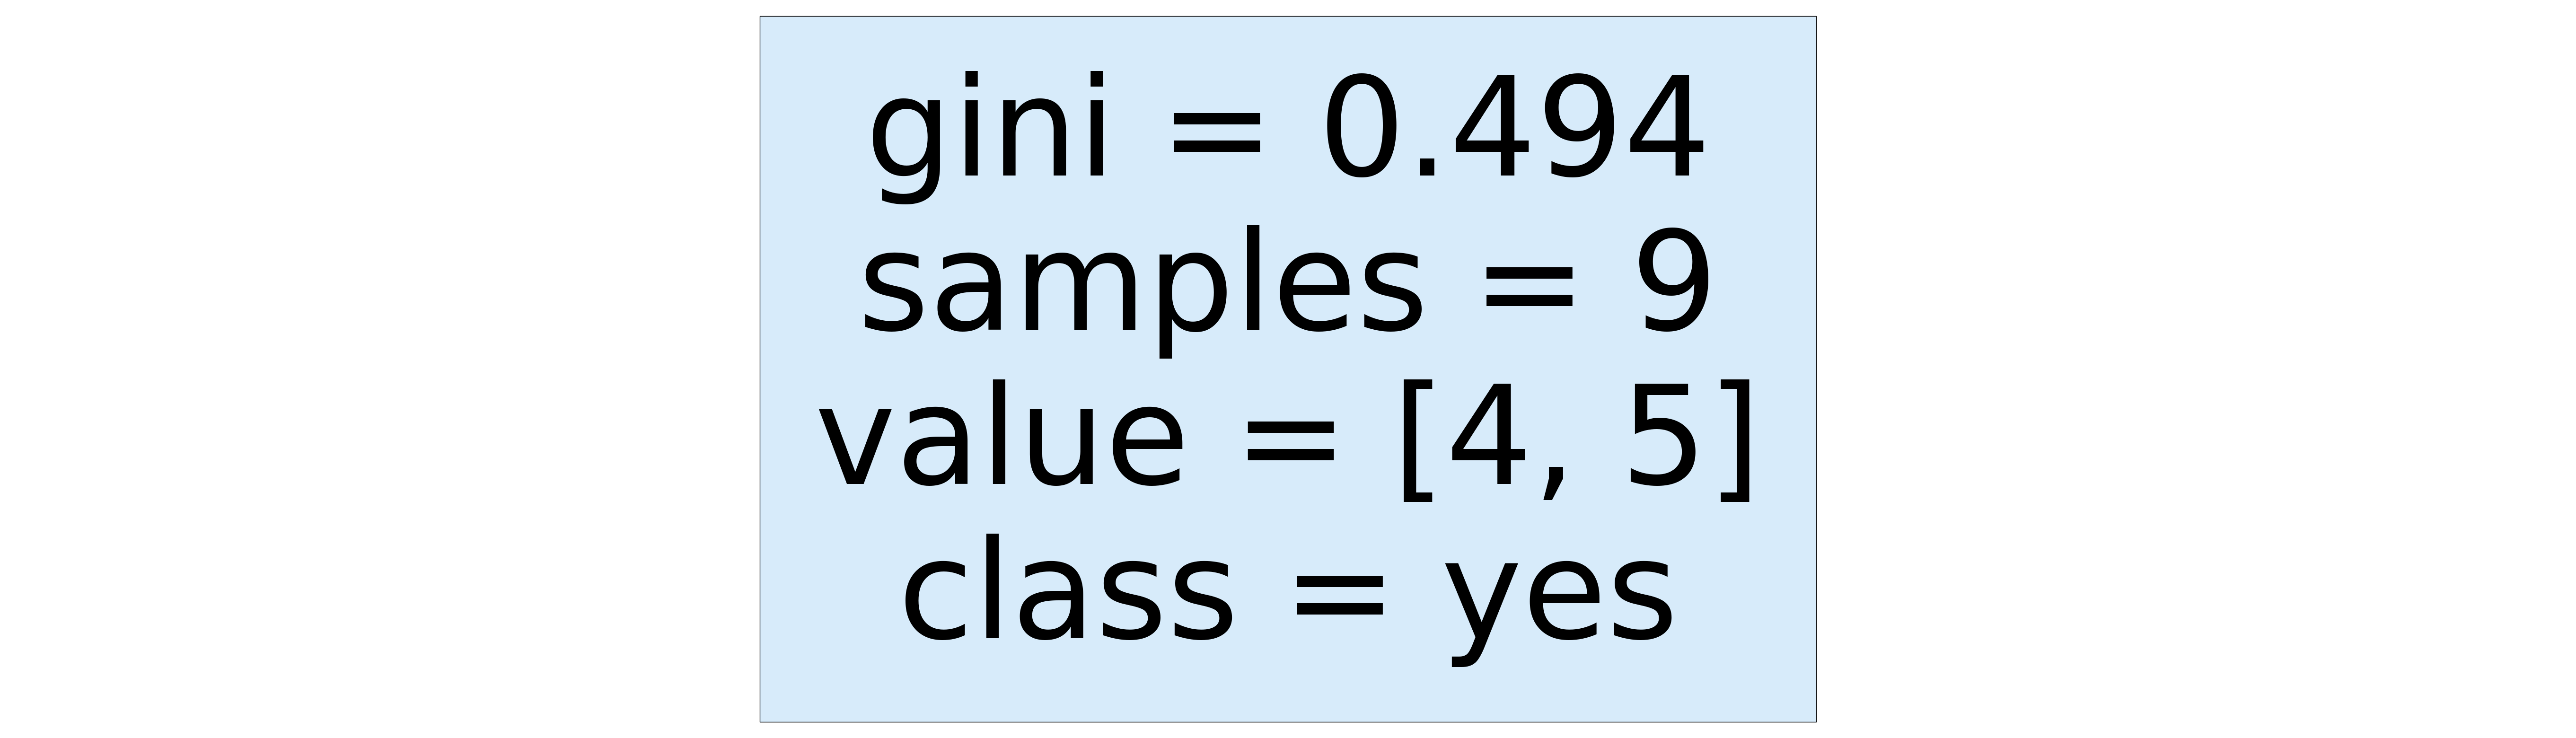

In [31]:
import matplotlib.pyplot as plt
from sklearn import tree

# Train decision tree model on preprocessed data

# ...

# Visualize tree 
plt.figure(figsize=(70,20)) 
tree.plot_tree(ml_model, 
               feature_names=['age', 'income', 'student', 'credit_rating'],
               class_names=['no', 'yes'],
               filled=True)

plt.show()

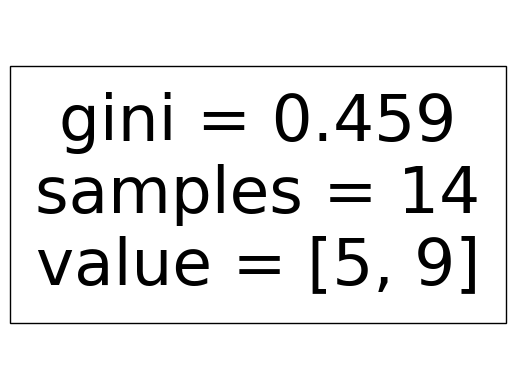

In [33]:
from sklearn import tree

tree.plot_tree(model) 
plt.show()

Gini training accuracy: 0.5555555555555556
Entropy training accuracy: 0.5555555555555556
Gini test accuracy: 0.8
Entropy test accuracy: 0.8


[Text(0.5, 0.5, 'entropy = 0.991\nsamples = 9\nvalue = [4, 5]')]

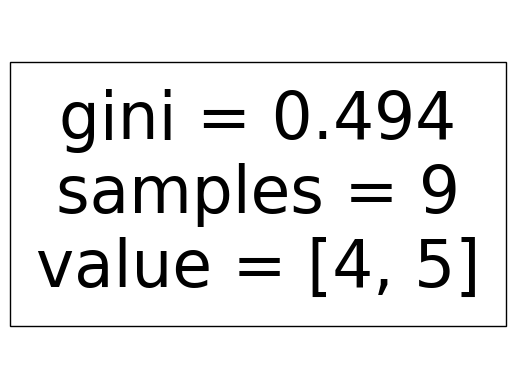

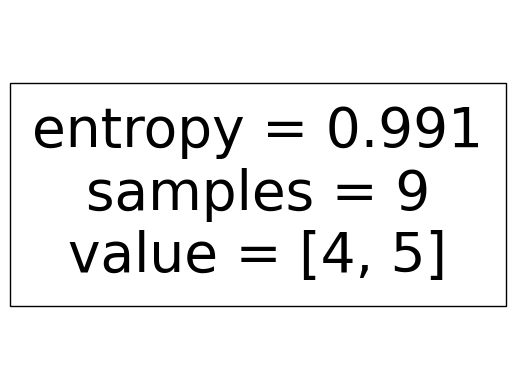

In [34]:
# Default gini model
model_gini = DecisionTreeClassifier()
model_gini.fit(X_train, y_train)

# Entropy model 
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

# Compare accuracy
print('Gini training accuracy:', model_gini.score(X_train, y_train))
print('Entropy training accuracy:', model_entropy.score(X_train, y_train))

print('Gini test accuracy:', model_gini.score(X_test, y_test))
print('Entropy test accuracy:', model_entropy.score(X_test, y_test))

# Visualize trees
plt.figure()
tree.plot_tree(model_gini)

plt.figure()
tree.plot_tree(model_entropy)

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Decision tree 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Random forest
rf = RandomForestClassifier(n_estimators=100) 
rf.fit(X_train, y_train)

# Compare training accuracy 
print("DT train accuracy:", dt.score(X_train, y_train))
print("RF train accuracy:", rf.score(X_train, y_train))

# Compare test accuracy
print("DT test accuracy:", dt.score(X_test, y_test))
print("RF test accuracy:", rf.score(X_test, y_test))


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values